In [226]:
from google.colab import files
uploaded = files.upload();

Saving rolling_stones_spotify1.csv to rolling_stones_spotify1 (1).csv



<center><font size="+5", align="center">Cohorts of Songs Project</font>
<p align="center">
    <img width="500" src="https://media.giphy.com/media/O3dGFXPsCqPr4b9X4W/giphy.gif" alt="Material Bread logo">
</p>
<p>


</p>

</center>
<center> <h1 style="text-align: center;">Problem Objective: </h1></center>
<center><p>As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. </p>
<p>The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.</p></center>



<center><font size="+2", align="center">Import Used Libraries</font>



In [227]:
# Import all used libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as sc
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# To ignore warnings during running the code.
import warnings
warnings.filterwarnings("ignore")

<center><font size="+2", align="center">Read and encode file</font>

In [228]:
# read csv file and print the header.
df = pd.read_csv('rolling_stones_spotify.csv', encoding='utf-8')
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [229]:
# Get summary statistics of the Dataframe that we have.
df.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

<center><font size="+2", align="center">Data cleaning & Preprocessing</font>



*   Check ID if it's uniqe:



In [230]:
if df.id.is_unique:
  print("The ID is unique.")

The ID is unique.


*   Check missing values:

In [231]:
# Get information of all columns
df.info(verbose = True)
print("#"*100)
print("#"*100)
# Check missing values or NA in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64



*   Remove white spaces and unused column.



In [232]:
# remove white spaces befoer and after word
df.columns = df.columns.str.replace(' ', '')
df.drop(columns=["Unnamed:0","id", "uri"], inplace = True)
# print satatment to see the results
print("Available features in our dataset: \n", df.keys())

Available features in our dataset: 
 Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')




*   Remove unnecsassery characters, whitespaces and numbers from (name).




In [233]:
# Remove unnecsassery characters in (name).
print("Example of data before removing:\n", df["name"].iloc[260:376])
df['name'] = df['name'].str.replace('[.\d*\/,-]', '', regex=True)
df['name'] = df['name'].str.replace(r'\s+', ' ', regex=True)
print("#"*100)
print("#"*100)
# print satatment to see the results
print("How's look after removing:\n", df["name"].iloc[360:376])

Example of data before removing:
 260                            Undercover (Of The Night)
261                                   Hate To See You Go
262                                       Out Of Control
263                                Rock And A Hard Place
264                                                Happy
                             ...                        
371                    Fannie Mae - Saturday Club / 1965
372          You Better Move On - Blues In Rhythm / 1964
373                        Mona - Blues In Rhythm / 1964
374                       Come On - Saturday Club / 1963
375    (I Can't Get No) Satisfaction - Saturday Club ...
Name: name, Length: 116, dtype: object
####################################################################################################
####################################################################################################
How's look after removing:
 360                    Cops And Robbers Blues In Rhythm 
361          



*   Change data type to string and change relased_date to be in datetime formate.

In [234]:
# Change datatype and convert date.
df['name'] = df['name'].astype('string')
df['album'] = df['album'].astype('string')
df['release_date'] = pd.to_datetime(df['release_date'])
# print satatment to see the results
print("After changing data type:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   string        
 1   album             1610 non-null   string        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n




*   Check and remove duplicate.

In [235]:
# Check data duplication and remove any.
print(f"Number of duplication before: {df.duplicated().sum()},\n Data shape: {df.shape}.")
df = df.drop_duplicates()
print(f"Number of duplication after: {df.duplicated().sum()},\n Data shape: {df.shape}.")

Number of duplication before: 6,
 Data shape: (1610, 15).
Number of duplication after: 0,
 Data shape: (1604, 15).


<center><font size="+2", align="center">Outliears </font>



*   Select numeric features



In [236]:
numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'track_number']



*   Finding outliers using boxplot.



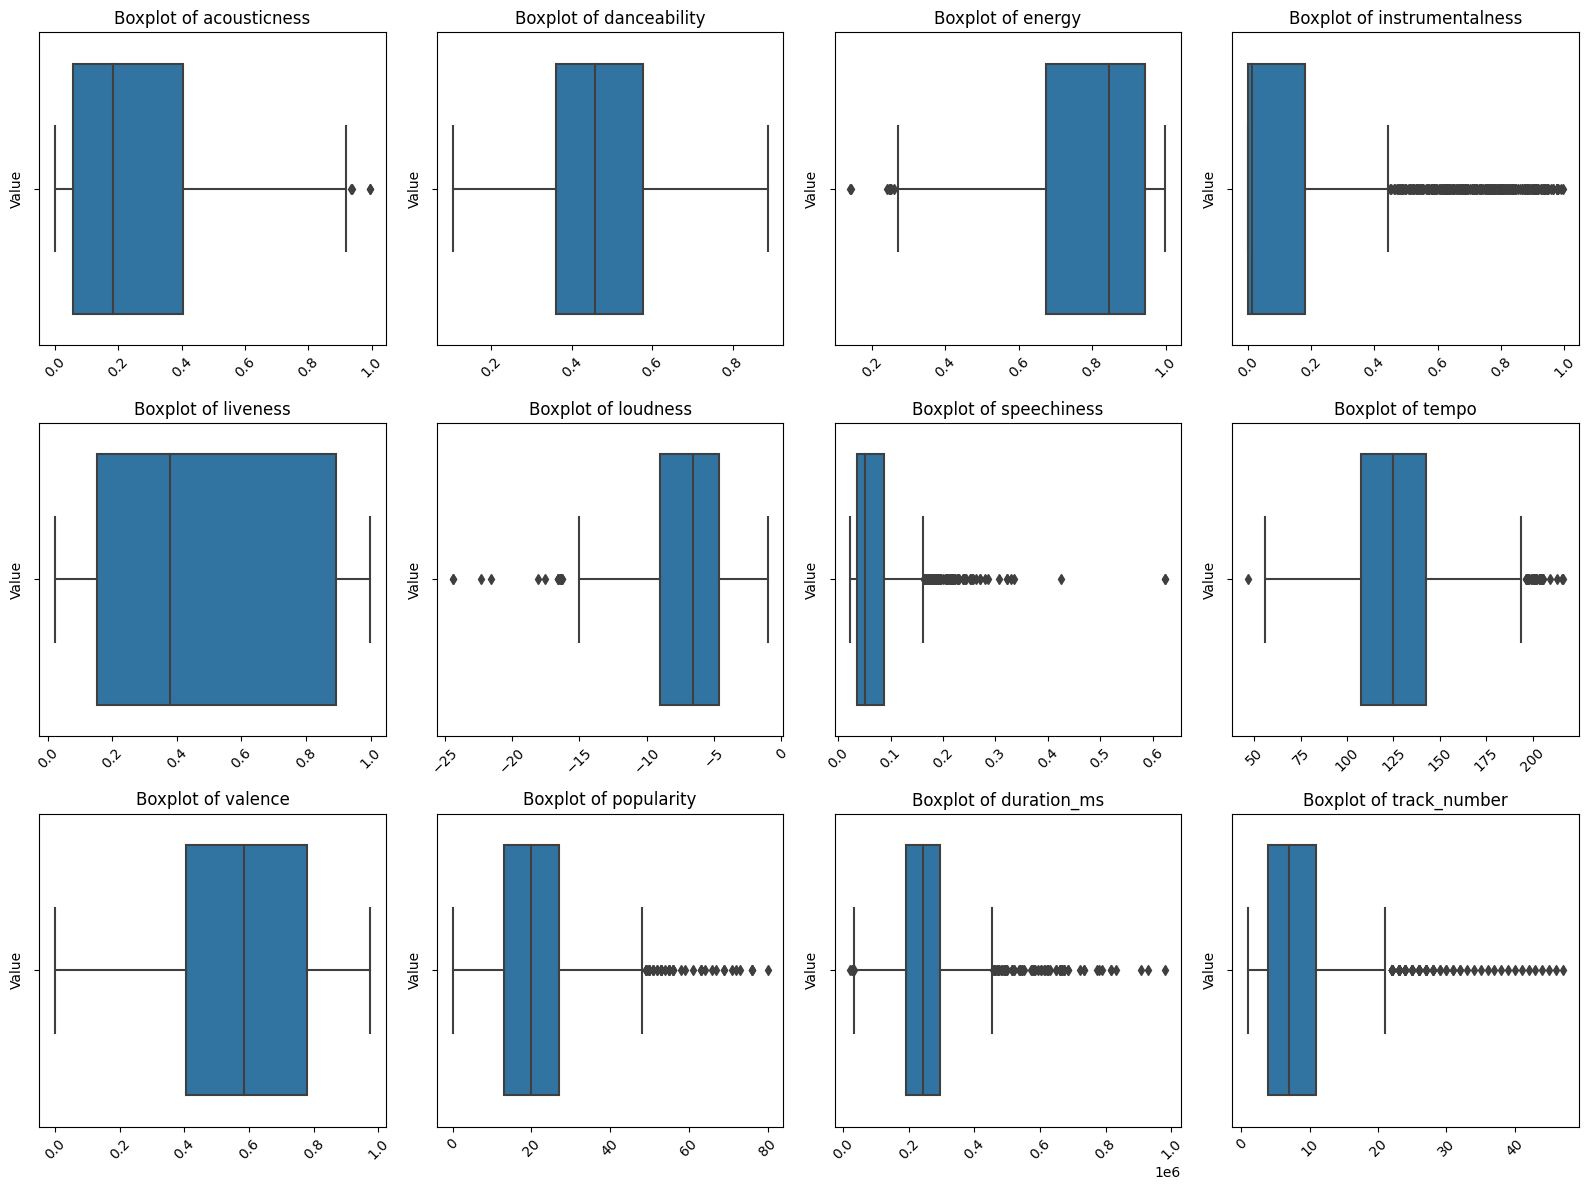

In [237]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
# Iterate through numeric_columns and create boxplots
for i, ax in enumerate(axes.ravel()):
  if i < len(numeric_columns):
    sns.boxplot(data=df, x=numeric_columns[i], ax=ax)
    ax.set_title(f'Boxplot of {numeric_columns[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
# Remove any empty subplots
for i in range(len(numeric_columns), 12):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()



*   Another way to identify and explore outliers.


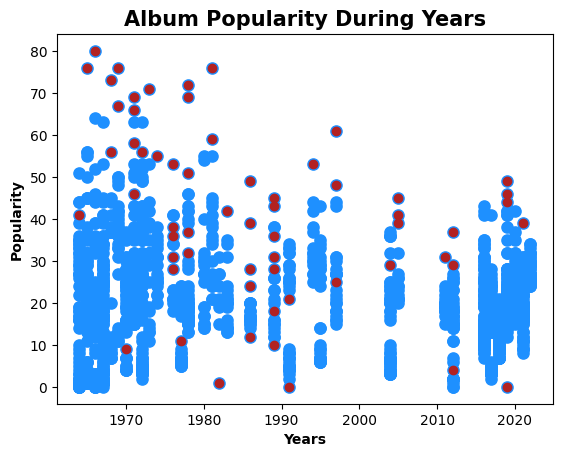

In [238]:
df['year'] = df['release_date'].dt.year
# Selecting specific columns from the DataFrame df
df_new = df[['popularity', 'year']]
# Converting the selected columns to a numpy array
X = df_new.values
# Creating an instance and fitting the model using the data X
nbrs = NearestNeighbors(n_neighbors=2)
nbrs.fit(X)
# Computing the distances and indices of the nearest neighbors for each sample
distances, indexes = nbrs.kneighbors(X)
# Identifying outliers by finding the indices of samples with the mean distance
outlier_index = np.where(distances.mean(axis=1) > 0.90)
# Extracting the outlier values
outlier_values = df_new.iloc[outlier_index]
# Creating a scatter plot of all data points from df_new in blue
plt.title("Album Popularity During Years", fontsize = 15, fontweight="bold")
plt.xlabel("Years", fontweight="bold")
plt.ylabel("Popularity", fontweight="bold")
plt.scatter(df_new['year'], df_new['popularity'], color="#1E90FF", s=65)
# Highlighting the outliers from outlier_values in red
plt.scatter(outlier_values['year'], outlier_values['popularity'],color="#B22222");



*   Remove upper outliers if > 2.



In [239]:
# List of columns to handle outliers
columns_to_handle_outliers = ['instrumentalness', 'speechiness', 'popularity', 'duration_ms', 'track_number']
# Define the threshold (e.g., 95th percentile) to cap upper outliers
threshold = 0.90
# Function to handle upper outliers
def handle_upper_outliers(df, column):
    upper_limit = df[column].quantile(threshold)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
# Handle upper outliers for the specified columns
for column in columns_to_handle_outliers:
    handle_upper_outliers(df, column)


*   Remove lower outliers if > 2 in (loudness).






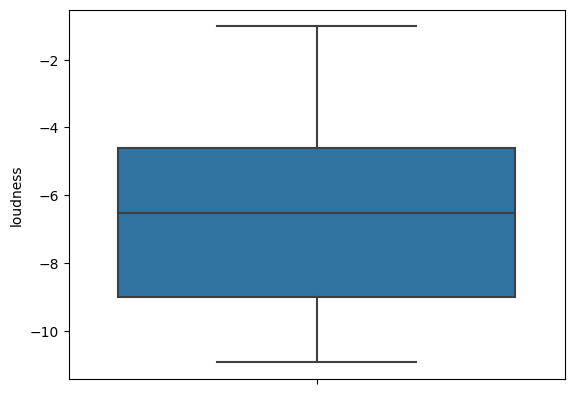

In [240]:
column_to_handle_outliers = 'loudness'
# Define the threshold (e.g., 5th percentile) to cap lower outliers
threshold = 0.10
# Function to handle lower outliers
def handle_lower_outliers(df, column):
    lower_limit = df[column].quantile(threshold)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
# Handle lower outliers for the specified column
handle_lower_outliers(df, column_to_handle_outliers)
sns.boxplot(y=df['loudness'])
# show plot
plt.show()

*   Remove lower outliers if > 2 in (energy).


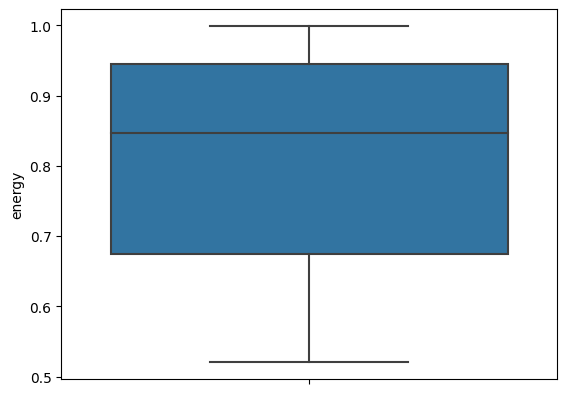

In [241]:
column_to_handle_outliers = 'energy'
# Define the threshold (e.g., 5th percentile) to cap lower outliers
threshold = 0.10
# Function to handle lower outliers
def handle_lower_outliers(df, column):
    lower_limit = df[column].quantile(threshold)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
# Handle lower outliers for the specified column
handle_lower_outliers(df, column_to_handle_outliers)
sns.boxplot(y=df['energy'])
# show plot
plt.show()

*   Remove lower outliers if > 2 in (tempo).



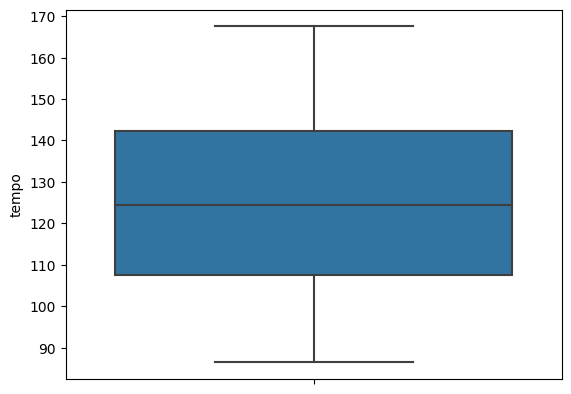

In [242]:
upper_limit = df['tempo'].quantile(0.90)
lower_limit = df['tempo'].quantile(0.10)
df['tempo'] = np.where(df['tempo'] < lower_limit, lower_limit, df['tempo'])
df['tempo'] = np.where(df['tempo'] > upper_limit, upper_limit, df['tempo'])
sns.boxplot(y=df['tempo'])
# show plot
plt.show()

*   Remove lower outliers if > 2 in (acousticness).

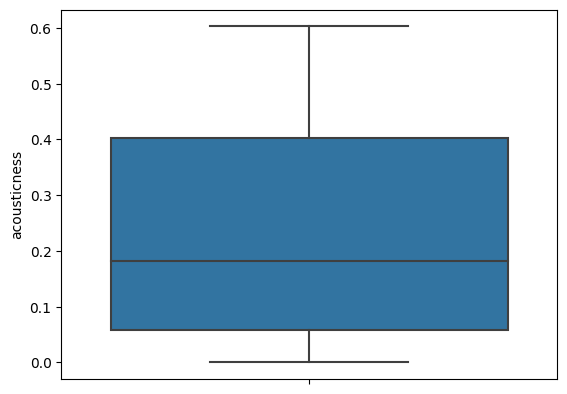

In [243]:
column_to_handle_outlier = 'acousticness'
# Define the threshold (e.g., 95th percentile) to cap upper outliers
threshold = 0.90
# Function to handle upper outliers
def handle_upper_outlier(df, column):
    upper_limit = df[column].quantile(threshold)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
# Handle upper outliers for the specified column (acousticness)
handle_upper_outlier(df, column_to_handle_outlier)
sns.boxplot(y=df['acousticness'])
# show plot
plt.show()



*   Features visualisation after removing outliers:



In [244]:
plot_rows = 3
plot_cols = 4
# Create subplots
fig = make_subplots(rows=plot_rows, cols=plot_cols, subplot_titles=numeric_columns)
# Loop to add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        if x < len(numeric_columns):
            # Make box plot of each column in numeric_columns
            fig.add_trace(go.Box(boxpoints='all', y=df[numeric_columns[x]].values,
                                 name=numeric_columns[x]), row=i, col=j)
            x += 1
# Format and show the figure
fig.update_layout(height=800, width=1000, showlegend=False,
                  title="<b>Features Visualisation After Removing Outliers</b>",
                   title_x=0.5)
fig.show()

> Indented blockThis grid of subplots provides a comprehensive view of the distribution and variation of the numeric columns in the DataFrame, allowing for comparisons and insights into their respective characteristics. The plot consists of multiple box plots, with each box plot representing a different numeric column, such as 'acousticness', 'danceability', 'energy', etc. The subplot titles correspond to the names of the numeric columns. The box plots display the distribution of values within each column, including the median, quartiles, and any potential outliers.





<center><font size="+2", align="center">Exploratory Data Analysis</font>



*   Visualizations to find the two albums that should be recommended based on the number of Popularity.



In [245]:
# Group by 'album' and calculate the sum of 'popularity'
album_popularity = df.groupby('album')['popularity'].sum().reset_index()
# Sort the albums by total popularity in descending order
album_popularity = album_popularity.sort_values(by='popularity', ascending=False)
# Create an interactive bar chart with Plotly

fig = px.bar(album_popularity.head(10), x='popularity', y='album',
             title='<b>Top 10 Albums With The Most Popular Songs</b>',
             labels={'popularity': 'Total Popularity', 'album': 'Album'},
             orientation='h')
# Show the interactive chart
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.update_layout(title_x=0.5)
fig.show()

> Indented blockWe grouped the data by the 'album' column and calculated the total popularity by summing the 'popularity' values for each song in the album. The resulted interactive bar chart displays the top 10 albums with the highest total popularity. The x-axis represents the total popularity, and the y-axis represents the album names. The chart allows for interactivity, such as hovering over the bars to view the total popularity values. This visualization provides a clear comparison of the total popularity among different albums, highlighting the two albums with the highest popularity (Honk and Tattoo You).







*  Identify the pattern of different features of songs.



In [246]:
df[numeric_columns].corr()

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000      0.080224 -0.340204          0.034923   
danceability          0.080224      1.000000 -0.328176         -0.022482   
energy               -0.340204     -0.328176  1.000000          0.120656   
instrumentalness      0.034923     -0.022482  0.120656          1.000000   
liveness             -0.108363     -0.516680  0.526189          0.007904   
loudness             -0.203530     -0.279190  0.695554          0.035683   
speechiness          -0.120061     -0.362929  0.539323         -0.014073   
tempo                -0.166061     -0.327299  0.245610          0.031091   
valence              -0.116434      0.549089 -0.001679          0.111684   
popularity            0.095262      0.113162 -0.030815          0.006504   
duration_ms           0.079815     -0.226146  0.166688         -0.167189   
track_number         -0.005628     -0.134848  0.091995         -0.021081   

                  liveness  loudness  speechiness     tempo   valence  \
acousticness     -0.108363 -0.203530    -0.120061 -0.166061 -0.116434   
danceability     -0.516680 -0.279190    -0.362929 -0.327299  0.549089   
energy            0.526189  0.695554     0.539323  0.245610 -0.001679   
instrumentalness  0.007904  0.035683    -0.014073  0.031091  0.111684   
liveness          1.000000  0.335431     0.471883  0.134739 -0.348768   
loudness          0.335431  1.000000     0.284458  0.149380 -0.059789   
speechiness       0.471883  0.284458     1.000000  0.261952 -0.403279   
tempo             0.134739  0.149380     0.261952  1.000000 -0.010623   
valence          -0.348768 -0.059789    -0.403279 -0.010623  1.000000   
popularity       -0.174573  0.183472    -0.143311 -0.060031  0.055537   
duration_ms       0.308626  0.280174     0.154245 -0.006287 -0.265472   
track_number      0.207150  0.089695     0.115721 -0.029113 -0.125655   

                  popularity  duration_ms  track_number  
acousticness        0.095262     0.079815     -0.005628  
danceability        0.113162    -0.226146     -0.134848  
energy             -0.030815     0.166688      0.091995  
instrumentalness    0.006504    -0.167189     -0.021081  
liveness           -0.174573     0.308626      0.207150  
loudness            0.183472     0.280174      0.089695  
speechiness        -0.143311     0.154245      0.115721  
tempo              -0.060031    -0.006287     -0.029113  
valence             0.055537    -0.265472     -0.125655  
popularity          1.000000     0.144317     -0.143931  
duration_ms         0.144317     1.000000      0.185581  
track_number       -0.143931     0.185581      1.000000

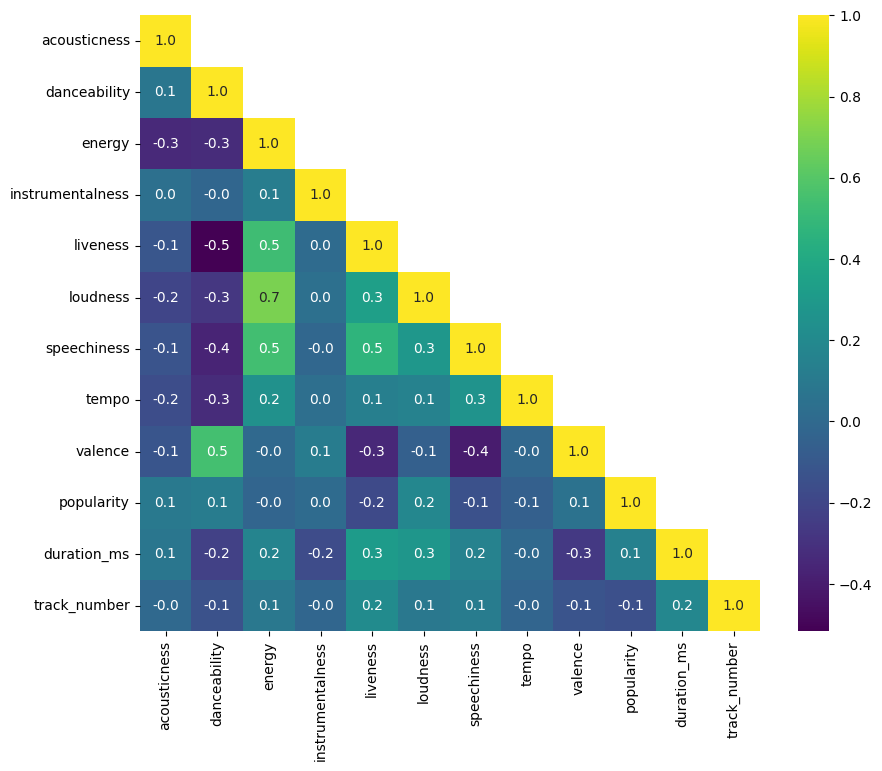

In [247]:
cor_data = df[numeric_columns].corr()
plt.figure(figsize = (10,8))
m = np.ones_like(cor_data)
m[np.tril_indices_from(m)]=0
sns.heatmap(cor_data,annot = True,mask = m,fmt='.1f',cmap='viridis')

plt.show()



> Indented block The heatmap, created using the Seaborn library, represents the pairwise correlations between the numeric columns. The correlation values are displayed as color-coded cells, with higher correlations shown in brighter colors. The diagonal cells are masked to focus only on the upper triangular matrix, as they represent redundant and mirrored correlations. The heatmap allows for easy identification of patterns and relationships between the numeric columns, providing insights into the strength and direction of their correlations.



In [248]:
# Create a scatter plot to show the relationship between 'energy' and 'loudness'
fig = px.scatter(df, x='energy', y='loudness', title='<b>Energy vs. Loudness</b>',
                 labels={'energy': 'Energy', 'loudness': 'Loudness'})
# Show the interactive scatter plot
fig.update_layout(title_x=0.5)
fig.show()



> Indented block
This interactive scatter plot visualize the relationship between two variables: 'energy' and 'loudness. The x-axis represents the 'energy' values, while the y-axis represents the 'loudness' values. This interactive plot allows users to hover over the data points to view specific values and provides a dynamic and visually appealing way to analyze the relationship between 'energy' and 'loudness'. By examining the distribution of data points and their positioning relative to the axes, we can gain insights regarding the potential correlation or pattern between these two variables.


In [249]:
# Create a scatter plot to show the relationship between 'danceability' and 'valence'
fig = px.scatter(df, x='danceability', y='valence', title='<b>Danceability vs. Valence</b>',
                 labels={'danceability': 'Danceability', 'valence': 'Valence'})
# Show the interactive scatter plot
fig.update_layout(title_x=0.5)
fig.show()



>  
This interactive scatter plot visualize the relationship between two variables: 'danceability' and 'valence. The x-axis represents the 'danceability' values, while the y-axis represents the 'valence' values. This interactive plot allows users to hover over the data points to view specific values and provides a dynamic and visually appealing way to analyze the relationship between 'danceability' and 'valence'. By examining the distribution of data points and their positioning relative to the axes, we can gain insights regarding the potential correlation or pattern between these two variables.



In [250]:
# Create a scatter plot to show the relationship between 'energy' and 'speechiness'
fig = px.scatter(df, x='energy', y='speechiness', title='<b>Energy vs. Speechiness</b>',
                 labels={'energy': 'Energy', 'speechiness': 'Speechiness'})
# Show the interactive scatter plot
fig.update_layout(title_x=0.5)
fig.show()

> This interactive scatter plot visualize the relationship between two variables: 'energy' and 'speechiness. The x-axis represents the 'energy' values, while the y-axis represents the 'speechiness' values. This interactive plot allows users to hover over the data points to view specific values and provides a dynamic and visually appealing way to analyze the relationship between 'energy' and 'speechiness'. By examining the distribution of data points and their positioning relative to the axes, we can gain insights regarding the potential correlation or pattern between these two variables.

In [251]:


# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['tempo'],
    y=df['valence'],
    z=df['loudness'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['loudness'],
        colorscale='Viridis',
        colorbar=dict(title='Loudness')
    )
)])

# Set labels for the axes
fig.update_layout(scene=dict(
    xaxis_title='Tempo',
    yaxis_title='Valence',
    zaxis_title='Loudness'
))

# Set the title
fig.update_layout(title='<b>Tempo and Valence vs. Loudness</b>',title_x=0.5)

# Show the interactive 3D plot
fig.show()

> The plot visualizes the relationships between three variables: 'tempo', 'valence', and 'loudness'. The x-axis represents the 'tempo' values, the y-axis represents the 'valence' values, and the z-axis represents the 'loudness' values. Each data point is represented by a marker, and the size of the markers is set to 4. The color of the markers is determined by the 'loudness' values, and a colorbar is included to indicate the corresponding loudness range. This interactive 3D scatter plot allows for the exploration of the relationships among tempo, valence, and loudness, providing insights into potential patterns or correlations between these variables.

In [252]:
# Create a 3D scatter plot using Plotly with the 'viridis' colormap
fig = px.scatter_3d(
    df,
    x='energy',
    y='liveness',
    z='popularity',
    color='popularity',
    color_continuous_scale='viridis',  # Set the colormap to 'viridis'
    title='<b>Energy and Liveness vs. Popularity</b>',
    labels={'energy': 'Energy', 'liveness': 'Liveness', 'popularity': 'Popularity'},
)
fig.update_layout(scene=dict(
    xaxis_title='Energy',
    yaxis_title='Liveness',
    zaxis_title='Popularity'
),title_x=0.5)
# Show the interactive 3D scatter plot
fig.show()


> The plot visualizes the relationships between three variables: 'energy', 'liveness', and 'popularity'. The x-axis represents the 'energy' values, the y-axis represents the 'liveness' values, and the z-axis represents the 'popularity' values. Each data point is represented by a marker, with the color of the markers indicating the 'popularity' values. This interactive 3D scatter plot allows for the exploration of the relationships among tempo, valence, and loudness, providing insights into potential patterns or correlations between these variables.

In [253]:

custom_colors = px.colors.qualitative.Set3[:len(df['track_number'])]
fig = px.bar(
    df,
    x='track_number',
    y='energy',
    title='<b>Track Number vs. Energy</b>',
    labels={'track_number': 'Track Number', 'energy': 'Energy'},
    color_discrete_sequence=custom_colors
)
fig.update_layout(
    xaxis_title='Track Number',
    yaxis_title='Energy', title_x=0.5
)

fig.show()

> The chart represents the relationship between the 'track_number' and 'energy' variables. The x-axis corresponds to the track numbers, while the y-axis represents the energy values. Each bar in the chart represents a track. This interactive bar chart enables the examination of energy levels across different tracks, facilitating comparisons and insights into how energy varies based on the track number.

In [254]:
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year
popularity_by_year = df.groupby('release_year')['popularity'].mean()
# Create a line chart to show the popularity trend over time
fig = px.line(popularity_by_year, title='<b>Popularity Over Time</b>', labels={'index': 'Release Year', 'values': 'Mean Popularity'})
fig.update_layout(title_x=0.5)
fig.show()

> This interactive line chart illustrates the trend of popularity over time. The x-axis of the chart represents the release years, while the y-axis represents the mean popularity values. This line chart allows for easy visualization of the overall popularity trend and any potential patterns or fluctuations that have occurred over time. By examining the line's trajectory, users can gain insights into the general trajectory of popularity and identify specific years or periods of noticeable popularity shifts.

In [255]:
# Columns to aggregate
columns_to_aggregate = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'track_number']
# Create an empty DataFrame to store the results
yearly_data = pd.DataFrame()

# Group by 'release_year' and calculate the mean for selected columns
yearly_data['release_year'] = df['release_year'].unique()
for column in columns_to_aggregate:
    yearly_data[f'mean_{column}'] = df.groupby('release_year')[column].mean().values
# List of factors to analyze
factors_to_analyze = columns_to_aggregate  # You can customize this list
# Create a Plotly figure with subplots for each factor's trend
num_rows, num_cols = 3, 4  # Define the number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=factors_to_analyze)
# Iterate through the factors and add a line chart for each trend
for i, factor in enumerate(factors_to_analyze):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(
        px.line(yearly_data, x='release_year', y=f'mean_{factor}', title=factor)
            .update_traces(mode='lines+markers')
            .data[0],
        row=row,
        col=col
    )

# Update the layout
fig.update_layout(
    title='<b>Trends Over Time for Various Factors</b>',
    xaxis=dict(title='Release Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=False,
    title_x=0.5
)
# Show the interactive plot
fig.show()


> We calculated the mean values of various factors grouped by the release year. Then we generated an interactive graph using Plotly that displays the trends over time for each specified factor. The graph consists of a grid of subplots, with each subplot representing a factor's trend. The lines in the graph depict the mean values of the factors across different release years, providing a visual representation of how these factors have changed or varied over time.

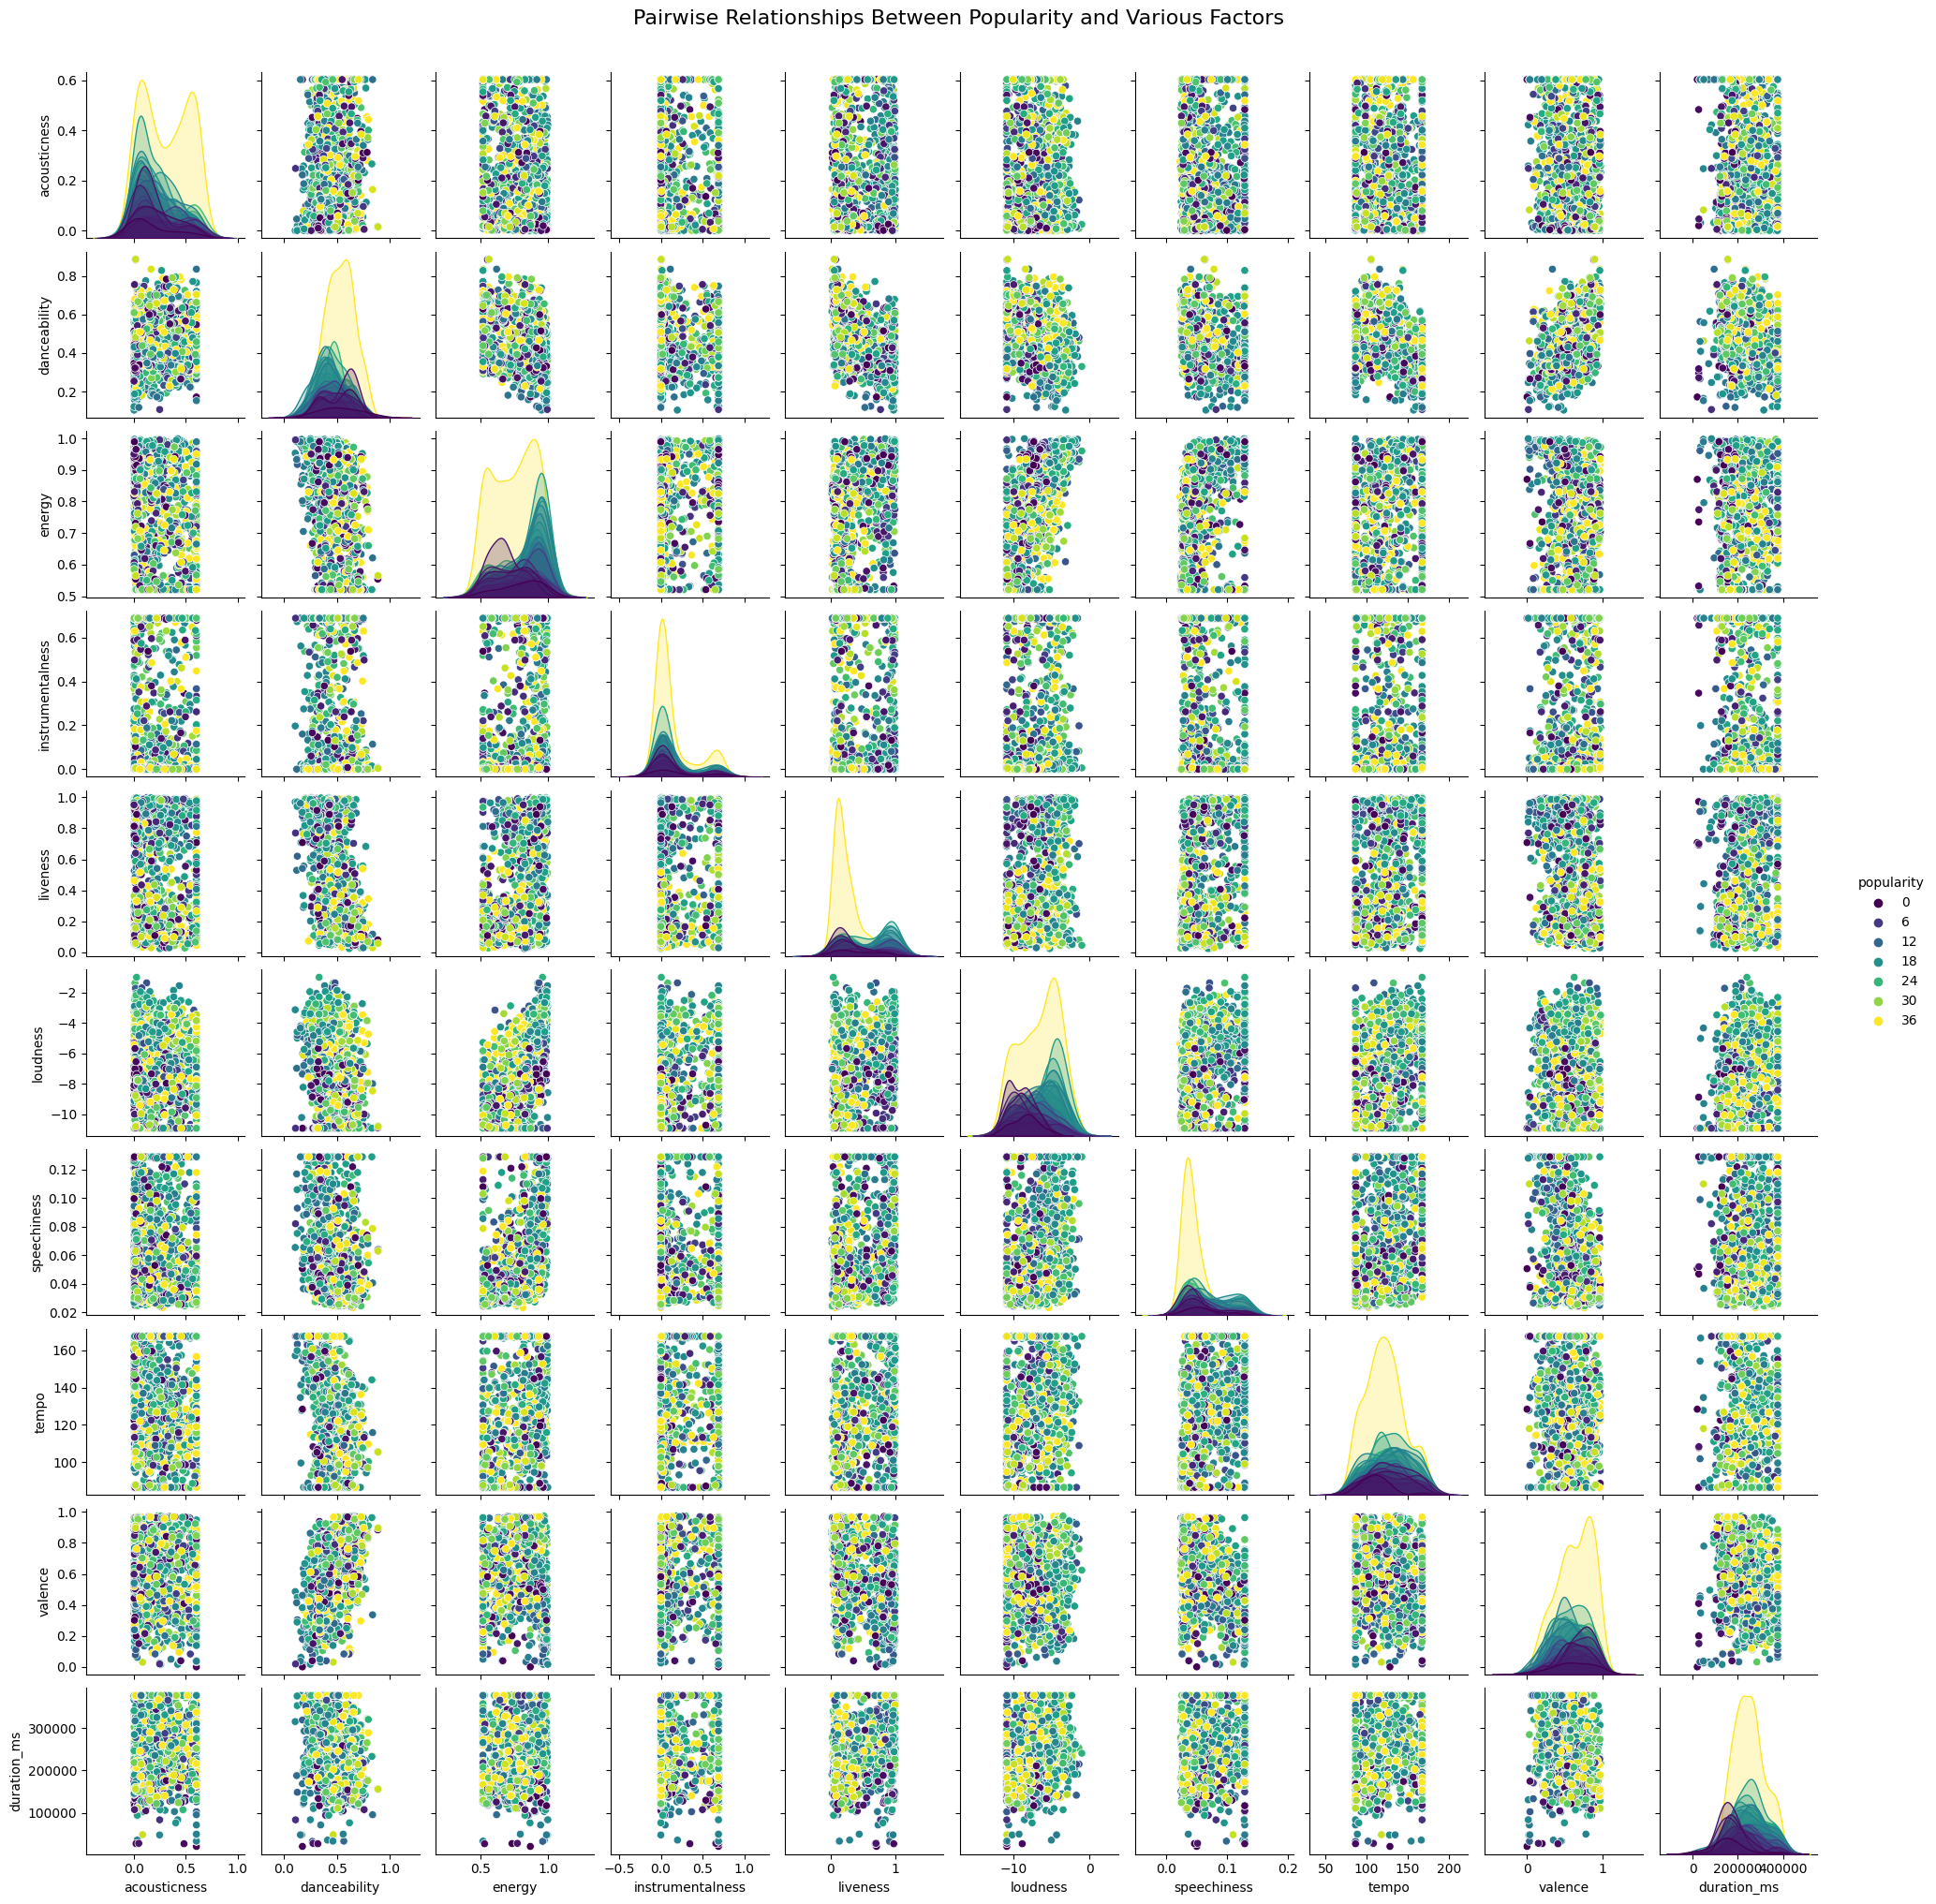

In [256]:

# List of columns to include in the pair plot
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']
# Create a DataFrame with the selected columns
data_to_plot = df[columns_to_plot]
# Create a pair plot
pair_plot = sns.pairplot(data_to_plot, hue='popularity', palette='viridis', height=2)
# Set the main title
pair_plot.fig.suptitle('Pairwise Relationships Between Popularity and Various Factors', y=1.02, size=16)
# Show the plot
plt.show()


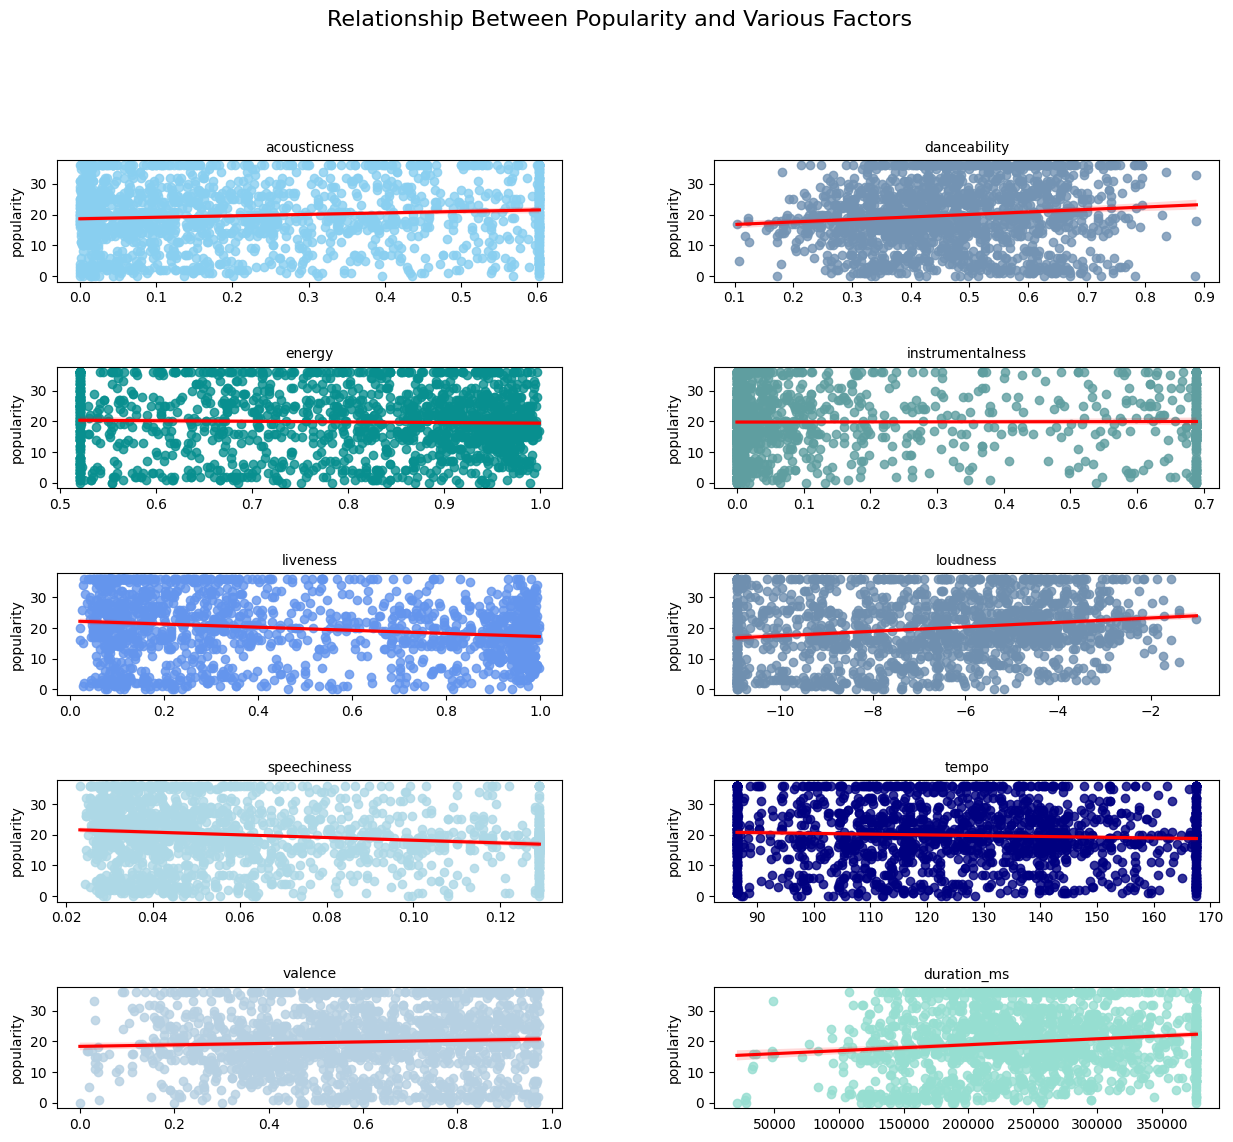

In [257]:

# List of columns to include in the pair plot
columns_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']

# Create a DataFrame with the selected columns
data_to_plot = df[columns_to_plot]

# Define the target variable
y = 'popularity'

# Extract the independent variables
independent_vars = columns_to_plot[:-1]

# Calculate the number of rows and columns for subplots
num_rows = len(independent_vars) // 2 + 1
num_cols = 2
# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))
# Specify custom colors for scatter plots
custom_colors = ['#89CFF0', '#7393B3', '#088F8F', '#5F9EA0', '#6495ED', '#6F8FAF', '#ADD8E6', '#000080', '#B6D0E2', '#96DED1']
# Iterate through the independent variables and create scatter plots with custom colors
for i, var in enumerate(independent_vars):
    row = i // 2
    col = i % 2
    sns.regplot(x=var, y=y, data=data_to_plot, ax=ax[row, col], line_kws={'color': 'red'}, color=custom_colors[i])
    ax[row, col].set_title(var, size=10)
    ax[row, col].set_xlabel('')

# Remove any empty subplots
for i in range(len(independent_vars), num_rows * num_cols):
    fig.delaxes(ax[i // 2, i % 2])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.7)

# Set the main title
fig.suptitle('Relationship Between Popularity and Various Factors', size=16)

# Show the plot
plt.show()

> Scatter plots were generated using Seaborn and Matplotlib libraries to visualize the relationships between various factors (e.g., acousticness, danceability, energy) and popularity. Each plot displays a factor's correlation with popularity and includes a regression line to illustrate the overall trend. These plots help analyze how different factors relate to popularity and identify potential patterns or correlations.


<center><font size="+2", align="center">Cluster Analysis</font>



*   Principal Component Analysis



In [258]:

numeric_columns = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']]
# PCA
sc = StandardScaler()
sc.fit(numeric_columns)
scaled_data = sc.transform(numeric_columns)

# create the PCA instance
pca = PCA(n_components=4)
# fit on data
pca.fit(scaled_data)
# transform data
pca_data = pca.transform(scaled_data)
print('The percebtage of Variance/data explained {:.4f}\n'.format(pca.explained_variance_ratio_.sum()*100))
print(pca_data)

The percebtage of Variance/data explained 65.5665

[[-1.09104677 -0.13028396  1.72266635  2.35318491]
 [-1.98197295  0.6602238  -1.03857059  1.29458791]
 [-2.31306283  0.45015306 -0.86844642  1.76523933]
 ...
 [ 2.45703577 -0.72810865 -0.98407596 -0.36813102]
 [ 2.67358847  0.34580553  0.29585946 -0.51846243]
 [ 2.21132085 -1.56418599 -1.23844814 -0.01088251]]


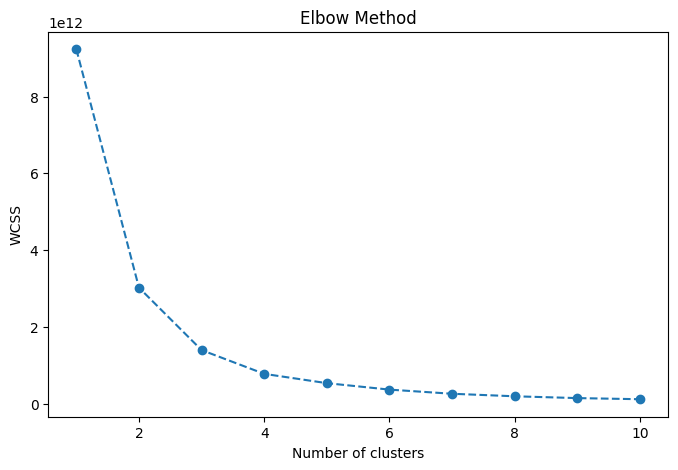

In [259]:
# Select the features for clustering (e.g., 'acousticness', 'danceability', 'energy', etc.)
features_for_clustering = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']]
# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

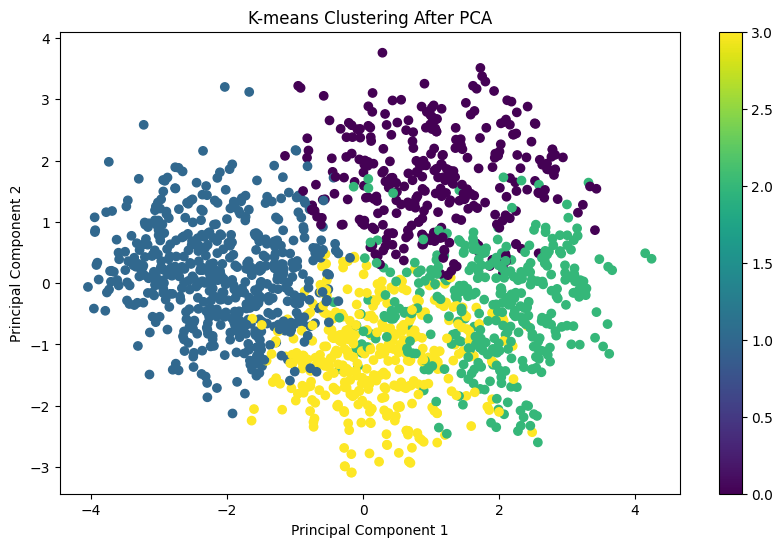

In [260]:
# Apply K-means clustering to PCA-transformed data
kmeans = KMeans(n_clusters=4, random_state=0)  # Specify the number of clusters (4 in this example)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_
# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels
# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


<center><font size="+10", align="center"> ...  THANK YOU  ...</font>
<center align="center">
    <img width="700" src="https://media.giphy.com/media/DAtJCG1t3im1G/giphy.gif" alt="Material Bread logo">
</center>

